In [29]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [30]:
# these commands are used to bring kaggle data in api format to google collab notebook
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [31]:
# this command is taken from kaggle settings and in the folder i have placed kaggle.json file which consists of our api token
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [32]:
# now doing this will create a zip file of our dataset which we need to extract
# if by change u loose this kaggle.json go to your kaggle profile->accounts->generate new api token->put that file here
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# now if u see your folder in collab u can see all your image files after running this command

In [33]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [34]:
# generators

# see this is explained in notebook

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [35]:
# Normalize : it is a function taking all my images as input from training and validation data and making each pixel of image between (0-1)

# see this fn is used in every cnn normalization so just use it
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [36]:
# create CNN model

# u can try running it without batch normalization and dropouts and then with them and u can compare the acc in the two cases

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [38]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
history = model.fit(train_ds,epochs=6,validation_data=validation_ds)

Epoch 1/6
625/625 [==============================] - 60s 93ms/step - loss: 0.6491 - accuracy: 0.6141 - val_loss: 0.5485 - val_accuracy: 0.7244
Epoch 2/6
625/625 [==============================] - 66s 105ms/step - loss: 0.5141 - accuracy: 0.7452 - val_loss: 0.4644 - val_accuracy: 0.7824
Epoch 3/6
625/625 [==============================] - 55s 88ms/step - loss: 0.4028 - accuracy: 0.8148 - val_loss: 0.4787 - val_accuracy: 0.7962
Epoch 4/6
625/625 [==============================] - 52s 82ms/step - loss: 0.2774 - accuracy: 0.8809 - val_loss: 0.5870 - val_accuracy: 0.7634
Epoch 5/6
625/625 [==============================] - 52s 83ms/step - loss: 0.1641 - accuracy: 0.9360 - val_loss: 0.7846 - val_accuracy: 0.7584
Epoch 6/6
625/625 [==============================] - 53s 84ms/step - loss: 0.0884 - accuracy: 0.9676 - val_loss: 0.9334 - val_accuracy: 0.7660


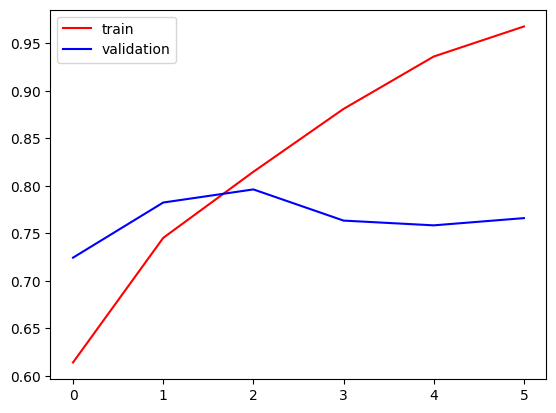

In [46]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

# this is about when i didnt used batch normalization and dropouts
# if u see intially both the acc were comparable but later val acc decreased these are the ways to find overfitting
# after using them currently u are seeing the new outputs

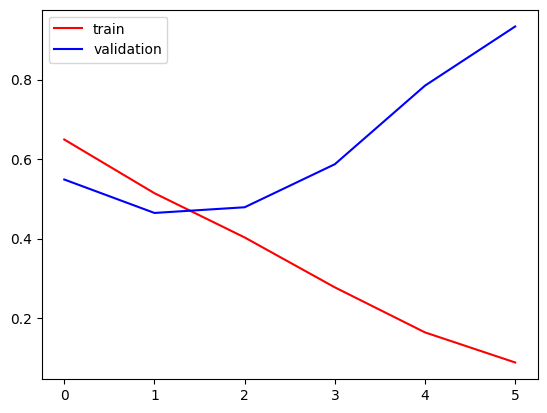

In [47]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [48]:
# ways to reduce overfitting

# Add more data-> here we have used complete data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity


# see batch noramlization and dropouts i have added in the model u can use regularization and data augmentation also

we have done training and testing on our splitted data lets now test it on unseen new data for that i am taking 1 dog and 1 cat image from internet lets see the results

In [61]:
import cv2


In [62]:
test_img = cv2.imread('/content/cat.jpeg')

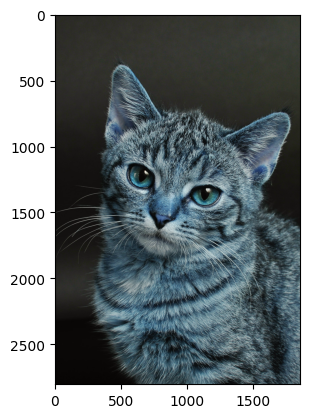

In [63]:
plt.imshow(test_img)

In [64]:
test_img.shape

(2804, 1862, 3)

In [65]:
test_img = cv2.resize(test_img,(256,256))

In [66]:
test_input = test_img.reshape((1,256,256,3))

In [68]:
model.predict(test_input)

# u can see cat->0

1/1 [==============================] - 0s 31ms/step


array([[0.]], dtype=float32)

In [69]:
test_img2 = cv2.imread('/content/dog.webp')

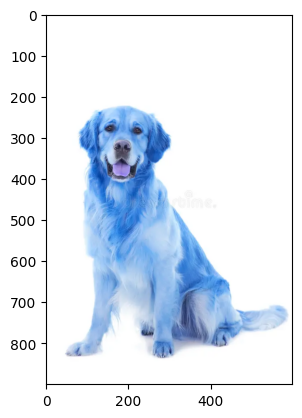

In [70]:
plt.imshow(test_img2)

In [71]:
test_img2 = cv2.resize(test_img2,(256,256))

In [72]:
test_input2 = test_img2.reshape((1,256,256,3))

In [74]:
model.predict(test_input2)

# u can see its predicting ->dog

1/1 [==============================] - 0s 80ms/step


array([[1.]], dtype=float32)